In [23]:
from sklearn.cluster import KMeans
import pandas as pd
import glob
from scipy import misc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
# Look pretty...
matplotlib.style.use('ggplot')
%matplotlib notebook


In [41]:

df = pd.read_csv('Datasets/CDR.csv')
df.ix[:,'CallDate'] = pd.to_datetime(df.ix[:,'CallDate'] , errors='coerce')
df.ix[:,'CallTime'] = pd.to_timedelta(df.ix[:,'CallTime'] , errors='coerce')
df.ix[:,'Duration'] = pd.to_timedelta(df.ix[:,'Duration'] , errors='coerce')


unique_phone_list = df['In'].unique().tolist()
markers =['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd']


<IPython.core.display.Javascript object>


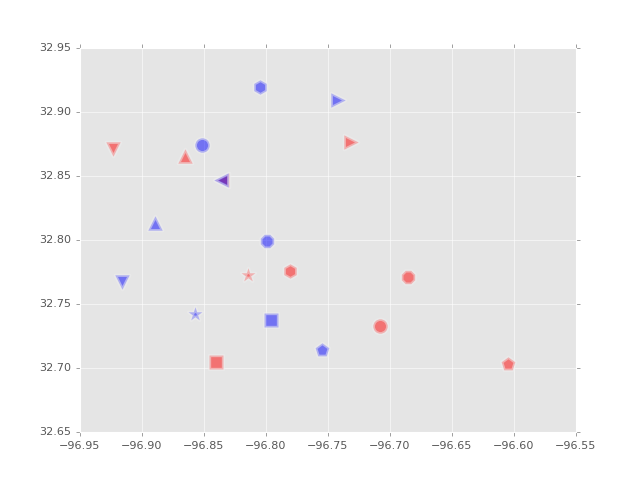

[[-96.70839404  32.73299989]]
[[-96.92355165  32.87097035]]
[[-96.86526087  32.86557287]]
[[-96.83577361  32.84688271]]
[[-96.73155696  32.87684057]]
[[-96.685556  32.770833]]
[[-96.84065775  32.70437017]]
[[-96.604444  32.703056]]
[[-96.81476225  32.77267817]]
[[-96.78028103  32.77609108]]
[[-96.90953865  32.90012755]
 [-96.85151976  32.87385429]
 [-96.81945506  32.84577996]]
[[-96.93521338  32.69562207]
 [-96.91638911  32.7674977 ]
 [-96.91649315  32.72173631]]
[[-96.893333    32.780278  ]
 [-96.8893306   32.81311457]
 [-96.900417    32.74356483]]
[[-96.84728933  32.8537123 ]
 [-96.836       32.846722  ]
 [-96.849601    32.86289873]]
[[-96.76024108  32.91727969]
 [-96.741944    32.909167  ]
 [-96.75721681  32.92280792]]
[[-96.87023018  32.81185528]
 [-96.79904523  32.79891488]
 [-96.83243969  32.80649534]]
[[-96.74246661  32.75360889]
 [-96.796111    32.7375    ]
 [-96.759167    32.739722  ]]
[[-96.83274489  32.7208804 ]
 [-96.75505064  32.71414165]
 [-96.8066212   32.72178311]]
[[-9

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)
for index in range(len(unique_phone_list)):
    df_user = df[df['In']== unique_phone_list[index]]
    df_user_weekend = df_user[(df_user['DOW'] == 'Sat') |( df_user['DOW']== 'Sun')]
    df_user_weekend_bf_6_af_10 = df_user_weekend[(df_user_weekend['CallTime'] <= '06:00:00')|
                                       (df_user_weekend['CallTime'] >= '22:00:00')]

    df_k_means = df_user_weekend_bf_6_af_10[['TowerLon','TowerLat']]

    kmeans = KMeans(n_clusters=1)
    kmeans.fit(df_k_means)  
    labels = kmeans.predict(df_k_means)
    centroids = kmeans.cluster_centers_
    #
    # INFO: Print and plot the centroids...
    marker = markers[index]
    ax.scatter(centroids[:,0], centroids[:,1], marker=marker, c='red', alpha=0.5, linewidths=3, s=169)
    print(centroids)
    
    

#### Now the weekday 


for index in range(len(unique_phone_list)):
    df_user = df[df['In']== unique_phone_list[index]]
    df_user_weekday = df_user[(df_user['DOW'] != 'Sat') & ( df_user['DOW'] != 'Sun')]
    df_user_weekday_day = df_user_weekday[(df_user_weekday['CallTime'] >= '07:30:00')&
                                       (df_user_weekday['CallTime'] <= '17:00:00')]
    df_k_means = df_user_weekday_day[['TowerLon','TowerLat']]
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(df_k_means)  
    labels = kmeans.predict(df_k_means)
    centroids = kmeans.cluster_centers_
    #
    # INFO: Print and plot the centroids...
    marker = markers[index]
    ax.scatter(centroids[1,0], centroids[1,1], marker=marker, c='blue', alpha=0.5, linewidths=3, s=169)
    print(centroids)
    plt.show()

    

In [42]:
df['In'].unique()
phone_list = [4638472273,2068627935,2894365987,1559410755,3688089071]

<IPython.core.display.Javascript object>


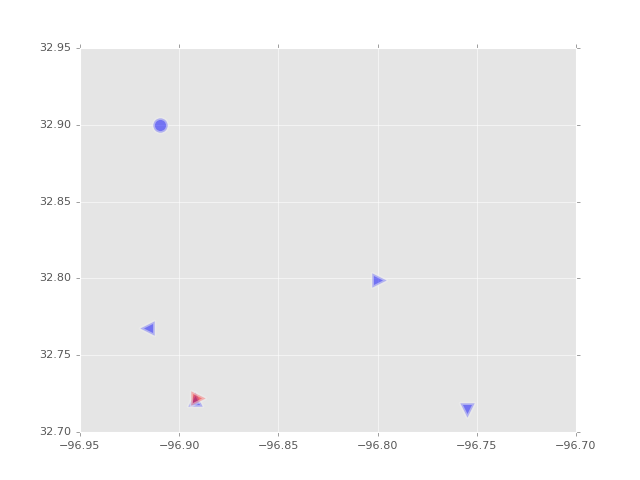

4638472273
-96.8515197553 32.8738542872
2068627935
-96.8066211987 32.721783106
2894365987
-96.875194 32.717667
1559410755
-96.9352133774 32.6956220739
3688089071
-96.8702301758 32.8118552813


In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
for index in range(len(phone_list)):
    df_user = df[df['In']== phone_list[index]]
    df_user_weekday = df_user[(df_user['DOW'] != 'Sat') & ( df_user['DOW'] != 'Sun')]
    df_user_weekday_day = df_user_weekday[(df_user_weekday['CallTime'] >= '07:30:00')&
                                       (df_user_weekday['CallTime'] <= '17:00:00')]
    df_k_means = df_user_weekday_day[['TowerLon','TowerLat']]
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(df_k_means)  
    labels = kmeans.predict(df_k_means)
    centroids = kmeans.cluster_centers_
    #
    # INFO: Print and plot the centroids...
    marker = markers[index]
    ax.scatter(centroids[1,0], centroids[1,1], marker=marker, c='blue', alpha=0.5, linewidths=3, s=169)
    print(phone_list[index])
    print(centroids[0,0], centroids[0,1])
x,y = -96.890587, 32.721986
ax.scatter(x, y, marker=marker, c='red', alpha=0.5, linewidths=3, s=169)
plt.show()

In [45]:
def doKMeans(data, clusters):
  data = data[['TowerLat','TowerLon']]
  kmeans = KMeans(n_clusters=clusters)
  model=kmeans.fit(data)  
  return model

In [46]:
df_user = df[df['In']== unique_phone_list[0]]
df_user_weekday = df_user[(df_user['DOW'] != 'Sat') & ( df_user['DOW'] != 'Sun')]
df_user_weekday_day = df_user_weekday[(df_user_weekday['CallTime'] >= '07:30:00')|
                                       (df_user_weekday['CallTime'] <= '17:00:00')]

In [52]:
# Find the cluster with the least # attached nodes
def clusterWithFewestSamples(model):
  # Ensure there's at least on cluster...
  minSamples = len(model.labels_)
  minCluster = 0
  for i in range(len(model.cluster_centers_)):
    if minSamples > (model.labels_==i).sum():
      minCluster = i
      minSamples = (model.labels_==i).sum()
  print ("\n  Cluster With Fewest Samples: ", minCluster)
  return (model.labels_==minCluster)

In [56]:
model = doKMeans(df_user_weekday_day,3)
midWayClusterIndices = clusterWithFewestSamples(model)
midWaySamples = df_user_weekday_day[midWayClusterIndices]


  Cluster With Fewest Samples:  0


In [86]:
midWaySamples.CallTime.mean()
ser_call_time = pd.Series([])

In [87]:
for index in range(len(unique_phone_list)):
    df_user = df[df['In']== unique_phone_list[index]]
    df_user_weekday = df_user[(df_user['DOW'] != 'Sat') & ( df_user['DOW'] != 'Sun')]
    df_user_weekday_day = df_user_weekday[(df_user_weekday['CallTime'] >= '07:30:00')&
                                           (df_user_weekday['CallTime'] <= '17:00:00')]
    model = doKMeans(df_user_weekday_day,3)
    midWayClusterIndices = clusterWithFewestSamples(model)
    midWaySamples = df_user_weekday_day[midWayClusterIndices]
    print(midWaySamples.CallTime.mean())
    print(len(midWaySamples))
    ser_call_time=ser_call_time.append(midWaySamples.CallTime)

ser_call_time.mean()


  Cluster With Fewest Samples:  2
0 days 07:47:50.059087
52

  Cluster With Fewest Samples:  1
0 days 07:49:19.221369
122

  Cluster With Fewest Samples:  0
0 days 11:18:57.882944
6

  Cluster With Fewest Samples:  2
0 days 07:45:59.996298
17

  Cluster With Fewest Samples:  1
0 days 07:48:00.978543
65

  Cluster With Fewest Samples:  0
0 days 07:48:45.287706
35

  Cluster With Fewest Samples:  1
0 days 07:59:48.811648
52

  Cluster With Fewest Samples:  2
0 days 07:48:54.733729
151

  Cluster With Fewest Samples:  2
0 days 07:49:08.500296
177

  Cluster With Fewest Samples:  2
0 days 07:52:42.540783
192


Timedelta('0 days 07:51:45.776031')

In [88]:
ser_call_time

687     07:58:32.520458
1096    07:47:24.372195
1172    07:40:49.055404
1362    07:55:23.333518
1588    07:55:20.281080
2496    07:32:14.165249
2756    07:57:41.470269
4056    07:57:21.286598
5029    07:35:14.390830
5657    07:49:15.200689
5779    07:54:55.266625
7262    10:28:26.468817
7612    07:47:29.379188
8131    07:33:33.780327
8206    07:30:18.228900
9463    07:33:50.397794
12880   07:40:03.157247
13651   07:42:43.541305
14639   07:50:43.388198
14911   07:42:38.217186
15158   07:53:39.038483
15432   07:35:23.249684
16624   07:31:03.496232
18169   07:30:01.217654
19978   08:43:15.871607
21821   07:50:07.073782
21951   07:53:22.856570
23180   07:36:27.189276
23710   07:34:15.321054
27541   07:56:01.184223
              ...      
44787   07:42:16.668758
45221   08:25:59.956839
45224   07:52:52.206043
45520   07:49:17.193960
46654   07:44:45.808959
47394   07:41:11.038235
47401   07:46:19.837912
47595   07:58:53.337052
47977   07:35:03.219384
48177   07:43:41.786965
48184   10:36:51